# step1:import libraries


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# step2:import the dataset

In [60]:
spam_df=pd.read_csv('emails.csv')

In [61]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [62]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [63]:
spam_df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


# get the summary of the data 

In [64]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [65]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## step3:visualize the dataset

## whenever we see 1 in spam we will group them together and whenever we see 0 in spam we will group them together



In [66]:
ham= spam_df[spam_df['spam']==0]


In [67]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [68]:
spam= spam_df[spam_df['spam']==1]

In [69]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [70]:
print('spam percentage =',(len(spam)/len(spam_df))*100,'%')

spam percentage = 23.88268156424581 %


In [71]:
print('ham percentage =',(len(ham)/len(spam_df))*100,'%')

ham percentage = 76.11731843575419 %


## counting number of datapoints in spam and ham 

<Axes: ylabel='count'>

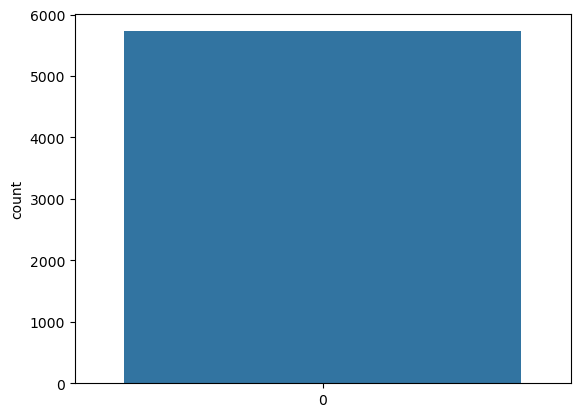

In [72]:
sns.countplot(spam_df['spam'],label='Count spam vs ham')

# count vectorizer example


this converts words to numbers so that the machine can understand


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data=['this is the first document.','this is the second document.','this is the third document.']

sample_vectorizer=CountVectorizer()

In [74]:
X=sample_vectorizer.fit_transform(sample_data)

In [75]:
print(X.toarray())

[[1 1 1 0 1 0 1]
 [1 0 1 1 1 0 1]
 [1 0 1 0 1 1 1]]


# using count vectorizer on our spam/ham problem

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer= CountVectorizer()

spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [77]:
# Access the vocabulary dictionary
vocabulary = vectorizer.vocabulary_

# Convert the vocabulary dictionary into a list of feature names
feature_names = list(vocabulary.keys())

# Print the feature names
print(feature_names)


['subject', 'naturally', 'irresistible', 'your', 'corporate', 'identity', 'lt', 'is', 'really', 'hard', 'to', 'recollect', 'company', 'the', 'market', 'full', 'of', 'suqgestions', 'and', 'information', 'isoverwhelminq', 'but', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'will', 'make', 'task', 'much', 'easier', 'we', 'do', 'not', 'promise', 'that', 'havinq', 'ordered', 'iogo', 'automaticaily', 'become', 'world', 'ieader', 'it', 'isguite', 'ciear', 'without', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'be', 'hotat', 'nowadays', 'marketing', 'efforts', 'more', 'here', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'image', 'convenience', 'stationery', 'are', 'provided', 'in', 'all', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'even', 'its', 'structure', 'promptness', 'you', 'see', 'drafts', 'within', 'thre

In [78]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [79]:
spamham_countvectorizer.shape

(5728, 37303)

so we have 5728 samples and 37303 columns with words

# step4: training the model

In [80]:
label=spam_df['spam'].values

In [81]:
label

array([1, 1, 1, ..., 0, 0, 0])

In [82]:

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()  
NB_classifier.fit(spamham_countvectorizer, label)



MultinomialNB()

In [85]:
testing_sample=['free money!!!','hi buddy,how are you doing lmk if u need anything']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [86]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

# step5: training and testing our data

In [88]:
X=spamham_countvectorizer
Y= label

In [89]:
X.shape

(5728, 37303)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [93]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifer.fit(X_train,Y_train)

MultinomialNB()

# step6: evaluating the model 

In [95]:
from sklearn.metrics import classification_report, confusion_matrix



In [96]:
Y_predict_train = NB_classifer.predict(X_train)
Y_predict_train

array([1, 1, 0, ..., 0, 0, 0])

<Axes: >

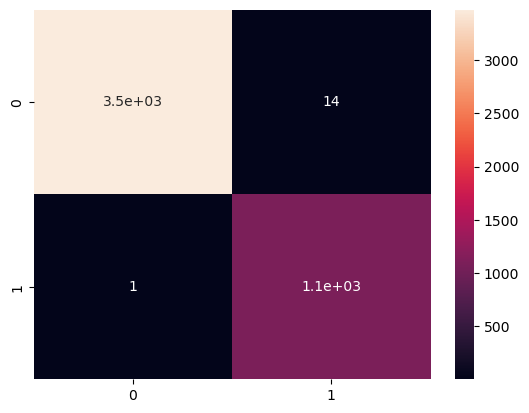

In [98]:
cm=confusion_matrix(Y_train,Y_predict_train)
sns.heatmap(cm,annot= True)

<Axes: >

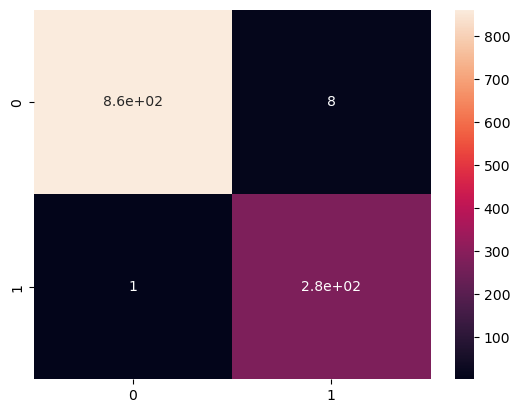

In [99]:
Y_predict_test=NB_classifer.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict_test)
sns.heatmap(cm,annot= True)

In [102]:
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       276

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

